In [1]:
import pandas as pd

In [2]:
# Read "Run Times.xlsx"
run_times = pd.read_excel('Data/Run Times.xlsx') #df
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [3]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                     object
dtype: object

In [4]:
run_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          5 non-null      object        
 1   Run Time      5 non-null      float64       
 2   Warm Up Time  5 non-null      object        
 3   Location      5 non-null      object        
 4   Run Date      5 non-null      datetime64[ns]
 5   Race Date     5 non-null      datetime64[ns]
 6   Rain          5 non-null      bool          
 7   Fee           5 non-null      object        
dtypes: bool(1), datetime64[ns](2), float64(1), object(4)
memory usage: 417.0+ bytes


## Converting Data Types

In [5]:
run_times.head()

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [6]:
run_times.Fee = pd.to_numeric(run_times.Fee.str.replace('$', ''))

In [7]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                    float64
dtype: object

In [8]:
run_times.head()

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,2.5


In [9]:
run_times['Warm Up Time']

0      3.5
1      3.5
2    3 min
3      2.2
4        2
Name: Warm Up Time, dtype: object

In [10]:
pd.to_numeric(run_times['Warm Up Time'], errors='coerce')

0    3.5
1    3.5
2    NaN
3    2.2
4    2.0
Name: Warm Up Time, dtype: float64

In [11]:
run_times['Warm Up Time'].str.replace(' min', '') # Creates NaN values. Not what we want.

0    NaN
1    NaN
2      3
3    NaN
4    NaN
Name: Warm Up Time, dtype: object

In [12]:
run_times['Warm Up Time'] = pd.to_numeric(run_times['Warm Up Time'].astype('str').str.replace(' min', '')) # Much better!
run_times['Warm Up Time']

0    3.5
1    3.5
2    3.0
3    2.2
4    2.0
Name: Warm Up Time, dtype: float64

In [13]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time           float64
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                    float64
dtype: object

In [14]:
run_times.head()

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3.0,“the gym”,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2.0,“gym”,2023-05-10 16:30:00,2023-06-15,False,2.5


In [15]:
run_times.Rain.astype('int')

0    0
1    1
2    0
3    0
4    0
Name: Rain, dtype: int32

In [16]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time           float64
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                    float64
dtype: object

## Finding Missing Data

In [17]:
import numpy as np

In [18]:
df = pd.read_excel('Data/Student Grades.xlsx')
df.tail()

,Student,Class,Year,Grade
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [19]:
df.shape

(86, 4)

In [20]:
np.NaN

nan

In [21]:
pd.NA

<NA>

In [22]:
None

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  84 non-null     object 
 1   Class    83 non-null     object 
 2   Year     80 non-null     object 
 3   Grade    82 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.8+ KB


In [24]:
df.Year.value_counts(dropna=False)

Year
Freshman     35
Sophomore    24
Junior       20
NaN           6
Senior        1
Name: count, dtype: int64

In [25]:
df.isna()

,Student,Class,Year,Grade
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
81,True,True,True,True
82,False,True,True,True
83,True,False,False,False
84,False,False,False,True


In [26]:
df.isna().sum()

Student    2
Class      3
Year       6
Grade      4
dtype: int64

In [27]:
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [28]:
df[df.isna().any(axis=1)].dropna(subset=['Student', 'Class'])

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [29]:
df[df.isna().any(axis=1)] # values still there! When we dropna we need to update the dataframe

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [30]:
#df = df.dropna(subset=['Student', 'Class'])
# OR
df.dropna(subset=['Student', 'Class'], inplace=True)

In [31]:
df.shape

(82, 4)

## Imputing Missing Data

In [32]:
# Fill missing data
df[df.Grade.isna()]

,Student,Class,Year,Grade
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [33]:
df.Grade.mean()

85.55

In [34]:
df.Grade.fillna(df.Grade.mean(), inplace=True)

C:\Users\Camilo\AppData\Local\Temp\ipykernel_14524\3132786124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Grade.fillna(df.Grade.mean(), inplace=True)


In [35]:
df.Grade

0     86.00
1     86.00
2     86.00
3     87.00
4     90.00
      ...  
77    85.00
78    93.00
79    91.00
80    87.00
84    85.55
Name: Grade, Length: 82, dtype: float64

In [36]:
# Resolving Missing Data

In [37]:
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [38]:
df[df.Class == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [39]:
df.loc[7,'Year'] = 'Freshman'

In [40]:
df[df.Class == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,Freshman,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [41]:
df.Year = np.where(df.Year.isna(), 'Freshman', df.Year)
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,EDA,Junior,85.00
78,Charles,EDA,Junior,93.00
79,Connor,EDA,Junior,91.00
80,Riley,EDA,Junior,87.00


In [42]:
df[df.Class == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,Freshman,88.0
8,William,Freshman Seminar,Freshman,89.0
9,Ethan,Freshman Seminar,Freshman,86.0


## Inconsistent Text & Typos

In [43]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [44]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: count, dtype: int64

In [45]:
df[df.Class.isin(['Exploratory Data Analysis', 'EDA'])]

,Student,Class,Year,Grade
58,Evelyn,Exploratory Data Analysis,Sophomore,89.00
59,Jack,Exploratory Data Analysis,Sophomore,84.00
60,Ella,Exploratory Data Analysis,Sophomore,200.00
61,Chloe,Exploratory Data Analysis,Sophomore,87.00
62,Landon,Exploratory Data Analysis,Junior,85.55
63,Christian,Exploratory Data Analysis,Junior,77.00
64,Jordan,Exploratory Data Analysis,Junior,83.00
65,Jonathan,Exploratory Data Analysis,Junior,82.00
66,Levi,Exploratory Data Analysis,Junior,91.00
67,Victoria,Exploratory Data Analysis,Junior,90.00


In [46]:
df[df.Class.isin(['Intro to Python', 'Python'])]

,Student,Class,Year,Grade
12,Alexander,Intro to Python,Freshman,85.0
13,Logan,Intro to Python,Freshman,85.0
14,James,Intro to Python,Freshman,82.0
15,Daniel,Intro to Python,Freshman,85.0
16,Elijah,Intro to Python,Freshman,85.0
17,Benjamin,Intro to Python,Freshman,81.0
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Python,Freshman,80.0
20,Jayden,Intro to Python,Freshman,82.0
21,Aiden,Intro to Python,Freshman,86.0


In [47]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [48]:
df.Year.value_counts()

Year
Freshman     38
Sophomore    24
Junior       19
Senior        1
Name: count, dtype: int64

In [49]:
df.Grade.describe()

count     82.000000
mean      85.550000
std       15.443965
min       45.000000
25%       81.000000
50%       85.275000
75%       89.750000
max      200.000000
Name: Grade, dtype: float64

In [50]:
df[df.Grade > 100]

,Student,Class,Year,Grade
60,Ella,Exploratory Data Analysis,Sophomore,200.0


In [51]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: count, dtype: int64

In [52]:
df.Class = np.where(df.Class == 'EDA', 'Exploratory Data Analysis', df.Class)
df.Class

0              Freshman Seminar
1              Freshman Seminar
2              Freshman Seminar
3              Freshman Seminar
4              Freshman Seminar
                ...            
77    Exploratory Data Analysis
78    Exploratory Data Analysis
79    Exploratory Data Analysis
80    Exploratory Data Analysis
84    Exploratory Data Analysis
Name: Class, Length: 82, dtype: object

In [53]:
df.Class = np.where(df.Class == 'Python', 'Intro to Python', df.Class)
df.Class

0              Freshman Seminar
1              Freshman Seminar
2              Freshman Seminar
3              Freshman Seminar
4              Freshman Seminar
                ...            
77    Exploratory Data Analysis
78    Exploratory Data Analysis
79    Exploratory Data Analysis
80    Exploratory Data Analysis
84    Exploratory Data Analysis
Name: Class, Length: 82, dtype: object

In [54]:
df.Class.value_counts()

Class
Intro to Python              26
Exploratory Data Analysis    24
Intro to SQL                 20
Freshman Seminar             12
Name: count, dtype: int64

In [55]:
df.Grade = np.where(df.Grade > 100, 100, df.Grade)
df.Grade.describe()

count     82.000000
mean      84.330488
std        8.824663
min       45.000000
25%       81.000000
50%       85.275000
75%       89.750000
max      100.000000
Name: Grade, dtype: float64

## Mapping Values

We will start from scratch since we made so many changes.

In [56]:
df_grades = pd.read_excel('Data/Student Grades.xlsx')
df_grades.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [57]:
df_grades.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [58]:
class_mappings = {
    'Intro to Python': 'Intro to Python',
    'Intro to SQL': 'Intro to SQL',
    'EDA': 'Exploratory Data Analysis',
    'Freshman Seminar': 'Freshman Seminar',
    'Exploratory Data Analysis': 'Exploratory Data Analysis',
    'Python': 'Intro to Python'
}

In [59]:
df_grades.Class = df_grades.Class.map(class_mappings)

In [60]:
df_grades.Class.value_counts()

Class
Intro to Python              26
Exploratory Data Analysis    25
Intro to SQL                 20
Freshman Seminar             12
Name: count, dtype: int64

## Cleaning Text

In [61]:
run_times.head()

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3.0,“the gym”,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2.0,“gym”,2023-05-10 16:30:00,2023-06-15,False,2.5


In [66]:
run_times.Location.value_counts()

Location
“school”     2
School       1
“the gym”    1
“gym”        1
Name: count, dtype: int64

In [74]:
run_times.Location = run_times.Location.str.lower().str.replace('the', '').str.strip('“”')
run_times.Location

0    school
1    school
2       gym
3    school
4       gym
Name: Location, dtype: object

## Find duplicate data and handle it

In [80]:
df_grades.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
81    False
82    False
83    False
84    False
85    False
Length: 86, dtype: bool

In [81]:
df_grades.duplicated().value_counts() # or sum

False    83
True      3
Name: count, dtype: int64

In [82]:
df_grades[df_grades.duplicated(keep=False)]

,Student,Class,Year,Grade
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Intro to Python,Freshman,80.0
42,Isaac,Intro to SQL,Sophomore,96.0
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


In [85]:
# remove duplicates!
df_grades.drop_duplicates(inplace=True)

In [86]:
df_grades[df_grades.duplicated(keep=False)]

,Student,Class,Year,Grade


In [88]:
df_grades.iloc[40:45,:] # we can see the ones removed by ids skipping others

,Student,Class,Year,Grade
41,Charlotte,Intro to SQL,Sophomore,92.0
42,Isaac,Intro to SQL,Sophomore,96.0
45,Harper,Intro to SQL,Sophomore,93.0
46,Ryan,Intro to SQL,Sophomore,76.0
47,Sofia,Intro to SQL,Sophomore,79.0


In [89]:
df_grades.reset_index(drop=True, inplace=True) # to reset ids after removing duplicated data

In [90]:
df_grades.iloc[40:45,:]

,Student,Class,Year,Grade
40,Charlotte,Intro to SQL,Sophomore,92.0
41,Isaac,Intro to SQL,Sophomore,96.0
42,Harper,Intro to SQL,Sophomore,93.0
43,Ryan,Intro to SQL,Sophomore,76.0
44,Sofia,Intro to SQL,Sophomore,79.0


## Outliers

In [96]:
import seaborn as sns

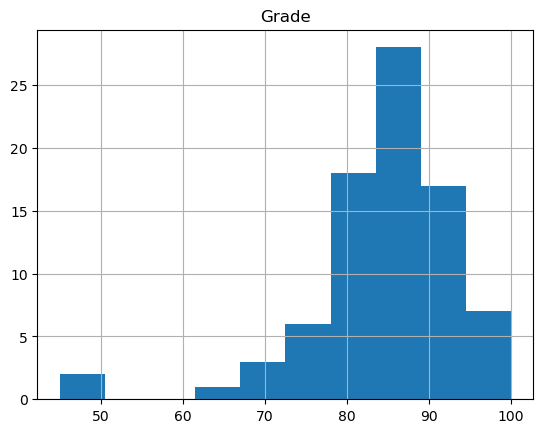

In [92]:
df.hist();

In [93]:
df.Grade.max() - df.Grade.min()

55.0

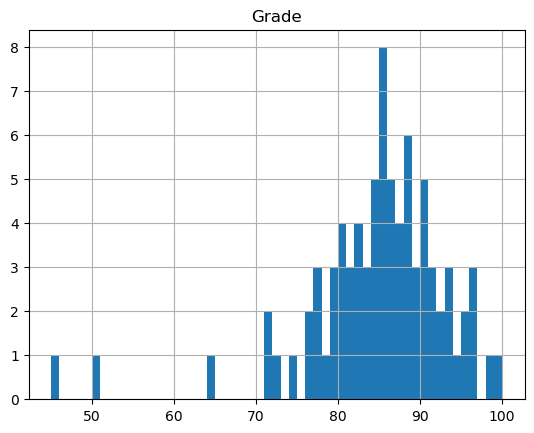

In [101]:
# Histograms
df.hist(bins=55);

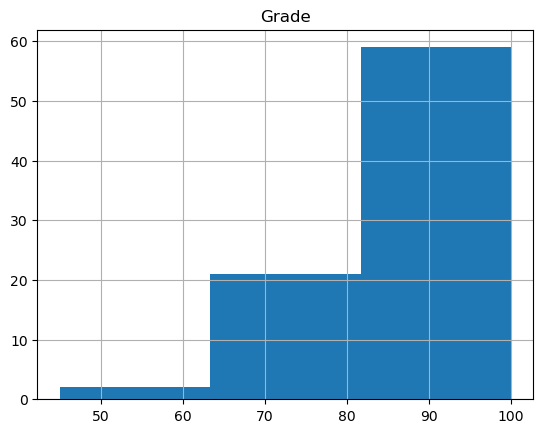

In [95]:
df.hist(bins=3);

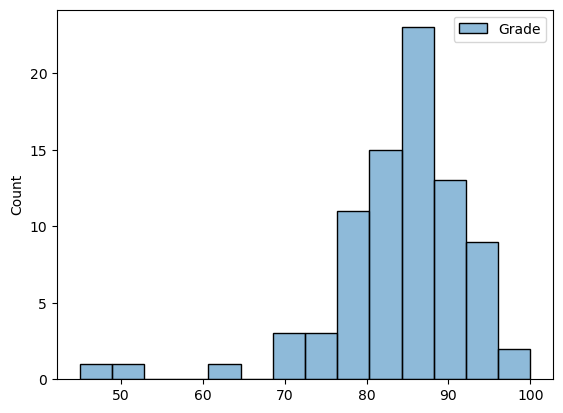

In [98]:
sns.histplot(df);

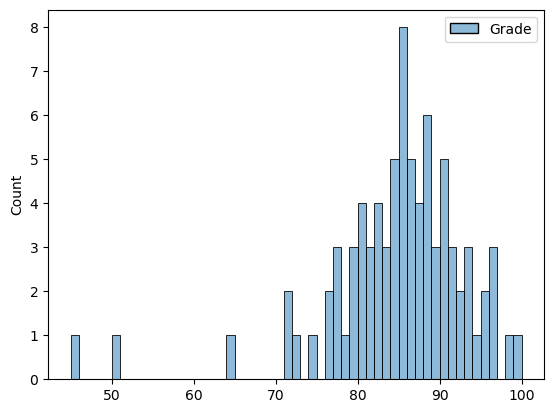

In [99]:
sns.histplot(df, binwidth=1);

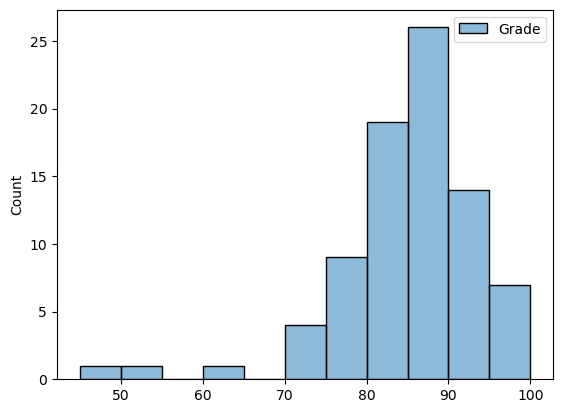

In [100]:
sns.histplot(df, binwidth=5);

<Axes: xlabel='Grade'>

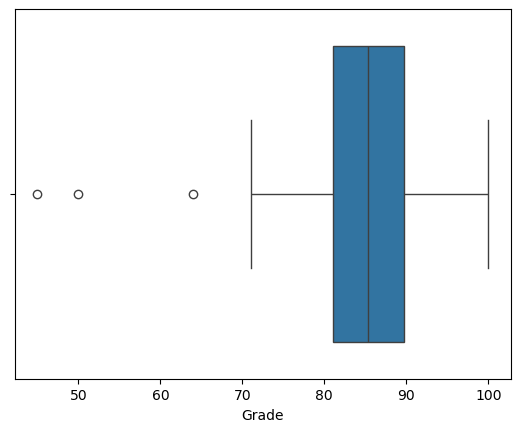

In [103]:
# Box Plots
sns.boxplot(x=df.Grade)

In [104]:
q25, q50, q75 = np.percentile(df.Grade, (25, 50, 75))

In [105]:
iqr = q75 - q25

In [106]:
min_grade = q25 - 1.5 * iqr
max_grade = q75 + 1.5 * iqr

In [107]:
min_grade, q25, q50, q75, max_grade

(67.875, 81.0, 85.275, 89.75, 102.875)

In [108]:
df[df.Grade < 69]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,50.0
56,Wyatt,Intro to SQL,Sophomore,45.0
69,Jaxon,Exploratory Data Analysis,Junior,64.0


In [110]:
# Standard Deviation: Measure of the spread of a dataset from the mean.
mean = np.mean(df.Grade)
sd = np.std(df.Grade)

In [111]:
mean, sd

(84.33048780487805, 8.770688976807925)

In [112]:
[grade for grade in df.Grade if (grade < mean - 3*sd) or (grade > mean + 3*sd)]

[50.0, 45.0]

In [113]:
[grade for grade in df.Grade if (grade < mean - 2*sd) or (grade > mean + 2*sd)]

[50.0, 45.0, 64.0]

In [114]:
[grade for grade in df.Grade if (grade < mean - 4*sd) or (grade > mean + 4*sd)]

[45.0]